In [2]:
import numpy as np
import cv2
import os
import cv2
import matplotlib.pyplot as plt
import re

# Crop Faces

### Image names

In [3]:
l = os.listdir('FDDB-folds')
l.sort()
l1 = re.findall(r'.*ellipseList.txt', '\n'.join(l))
print(l1)
l2 = re.findall(r'.*\d\d.txt', '\n'.join(l))
print(l2)

['FDDB-fold-01-ellipseList.txt', 'FDDB-fold-02-ellipseList.txt', 'FDDB-fold-03-ellipseList.txt', 'FDDB-fold-04-ellipseList.txt', 'FDDB-fold-05-ellipseList.txt', 'FDDB-fold-06-ellipseList.txt', 'FDDB-fold-07-ellipseList.txt', 'FDDB-fold-08-ellipseList.txt', 'FDDB-fold-09-ellipseList.txt', 'FDDB-fold-10-ellipseList.txt']
['FDDB-fold-01.txt', 'FDDB-fold-02.txt', 'FDDB-fold-03.txt', 'FDDB-fold-04.txt', 'FDDB-fold-05.txt', 'FDDB-fold-06.txt', 'FDDB-fold-07.txt', 'FDDB-fold-08.txt', 'FDDB-fold-09.txt', 'FDDB-fold-10.txt']


In [4]:
allImgNames = []
for fold in l2:
    with open('FDDB-folds/' + fold) as f:
        tmp = f.read().splitlines()
        tmp = [x + '.jpg' for x in tmp]
        allImgNames.extend(tmp)
print(f'First image: {allImgNames[0]}')
print(f'We have {len(allImgNames)} images')

First image: 2002/08/11/big/img_591.jpg
We have 2845 images


### Extract Faces & Resize to 24 x 24

In [30]:
itr = 0
current_face = 0 
# loop over all ellipseList.txt files
for ellipseList in l1:
    with open('FDDB-folds/' + ellipseList) as f:
        s = f.readlines()
        currentLine = 0
        while currentLine < len(s):
            # read image
            imgName = s[currentLine].strip() + '.jpg'
            try:
                img = cv2.imread('originalPics/' + imgName)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
            except Exception as e:
                print(f'Error reading image: {imgName}', e)
                currentLine += 1
                continue
            if img is None or img.shape[0] == 0 or img.shape[1] == 0:
                print(f'Error reading image: {imgName}')
                currentLine += 1
                continue
            currentLine += 1
            nFaces = int(s[currentLine].strip())
            currentLine += 1
            for i in range(nFaces):
                line = re.split(r'\s+', s[currentLine].strip())
                # print('currently in: ', line)
                major_axis, minor_axis, angle, center_x, center_y, detection_score  \
                    = line
                major_axis, minor_axis, angle, center_x, center_y, detection_score  \
                    = float(major_axis), float(minor_axis), float(angle), float(center_x), float(center_y), float(detection_score)
                currentLine += 1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
                # CROP each face, make them 24 * 24, and save them in a folder
                # I don't know why sin gives wrong dimensions! I used cos instead
                faceWidth, faceHeight = 2 * np.cos(np.deg2rad(angle)) * major_axis, 2 * np.cos(np.deg2rad(angle)) * minor_axis
                tmp = int(max(faceWidth, faceHeight))

                # same width and height to make it a square, and make face dimensions close to original image when resizing
                faceWidth, faceHeight = tmp, tmp

                # crop face
                p1 = (int(center_x - faceWidth / 2), int(center_y - faceHeight / 2))
                p1 = max(p1[0], 0), max(p1[1], 0)
                p2 = (int(center_x + faceWidth / 2), int(center_y + faceHeight / 2))
                p2 = max(p2[0], 0), max(p2[1], 0)
                croppedFace = img[p1[1]:p2[1], p1[0]:p2[0]]

                try:
                    # resize face
                    resizedFace = cv2.resize(croppedFace, (24, 24))
                except Exception as e:
                    print(p1, p2)
                    plt.imshow(img[p1[1]:p2[1], p1[0]:p2[0]])
                    plt.show()
                    print(f'Error resizing image: {imgName}', e)
                    raise e
                
                # save face in dset/faces
                imgFileName = imgName.split('/')[-1][:-4]
                # cv2.imwrite(f'dset/faces/{imgFileName}', cv2.cvtColor(resizedFace, cv2.COLOR_RGB2BGR))
                plt.imsave(f'dset/faces/{current_face}_{imgFileName}.jpg', resizedFace)
                current_face+=1
                print('saved face: ', f'dset/faces/{imgFileName}')
                # plt.imshow(resizedFace)
                # plt.show()
                itr += 1
    #             if itr == 10:
    #                 break
    #         if itr == 10:
    #             break
    #     if itr == 10:
    #         break
    # if itr == 10:
    #     break



saved face:  dset/faces/img_591
saved face:  dset/faces/img_265
saved face:  dset/faces/img_265
saved face:  dset/faces/img_265
saved face:  dset/faces/img_423
saved face:  dset/faces/img_490
saved face:  dset/faces/img_17676
saved face:  dset/faces/img_17676
saved face:  dset/faces/img_228
saved face:  dset/faces/img_228
saved face:  dset/faces/img_402
saved face:  dset/faces/img_402
saved face:  dset/faces/img_402
saved face:  dset/faces/img_769
saved face:  dset/faces/img_769
saved face:  dset/faces/img_581
saved face:  dset/faces/img_723
saved face:  dset/faces/img_821
saved face:  dset/faces/img_610
saved face:  dset/faces/img_610
saved face:  dset/faces/img_610
saved face:  dset/faces/img_610
saved face:  dset/faces/img_610
saved face:  dset/faces/img_610
saved face:  dset/faces/img_1116
saved face:  dset/faces/img_1116
saved face:  dset/faces/img_19238
saved face:  dset/faces/img_19238
saved face:  dset/faces/img_660
saved face:  dset/faces/img_607
saved face:  dset/faces/img_37

In [4]:

s = ''
with open('FDDB-folds/' + l1[0]) as f:
    s = f.read()
print(s[:10])

x = re.findall(r'(?:-?\d+\.\d+ ){5}.*', s, re.MULTILINE)
angles = [np.rad2deg(float(x_.split(' ')[2])) for x_ in x]
print(f'This file has {len(x)} faces')
print(f'the min angle is: {min(angles)}')
print(f'The max angle is: {max(angles)}')
print(f'Average of angles is : {np.mean(angles)}')


2002/08/11
This file has 515 faces
the min angle is: -89.90532864827605
The max angle is: 89.99998127603166
Average of angles is : 6.0525466951555025


2002/08/11/big/img_591.jpg
img_591.jpg


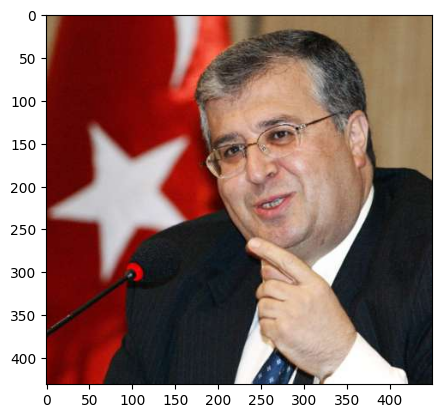

2002/08/26/big/img_265.jpg
img_265.jpg


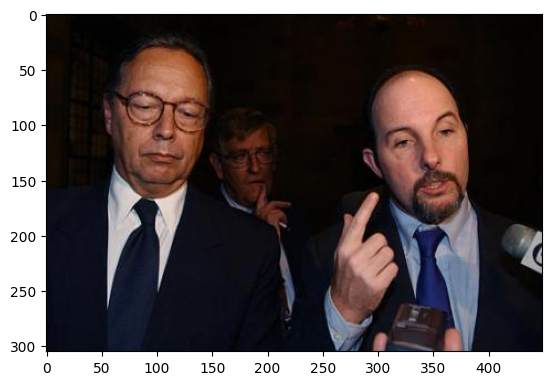

2002/07/19/big/img_423.jpg
img_423.jpg


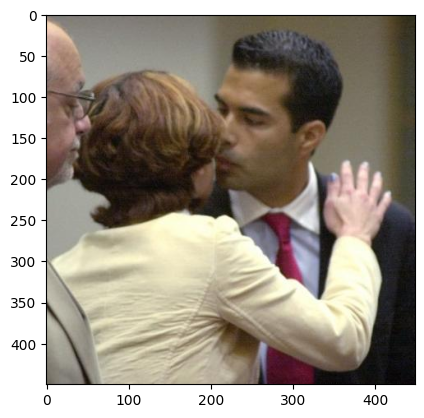

2002/08/24/big/img_490.jpg
img_490.jpg


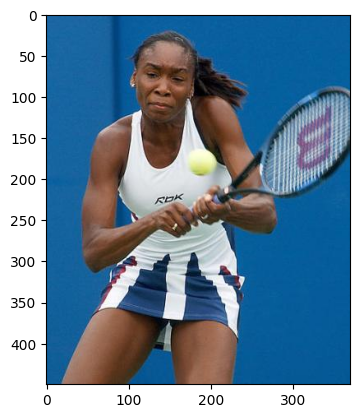

2002/08/31/big/img_17676.jpg
img_17676.jpg


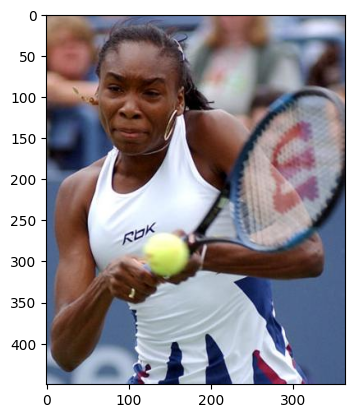

2002/07/31/big/img_228.jpg
img_228.jpg


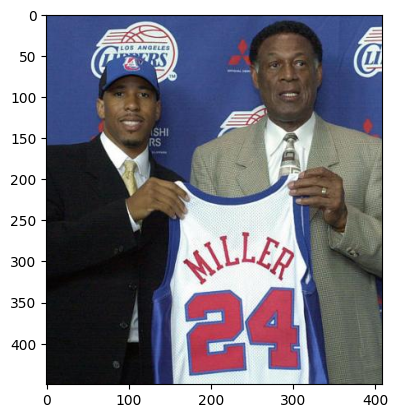

2002/07/24/big/img_402.jpg
img_402.jpg


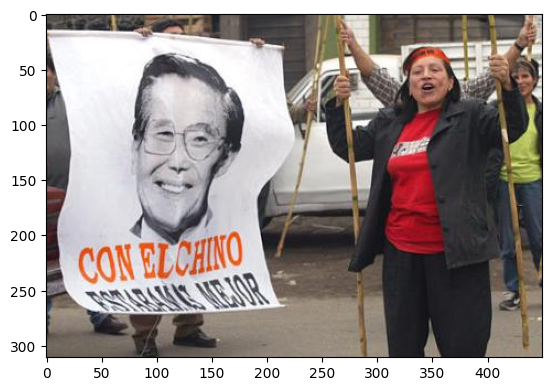

2002/08/04/big/img_769.jpg
img_769.jpg


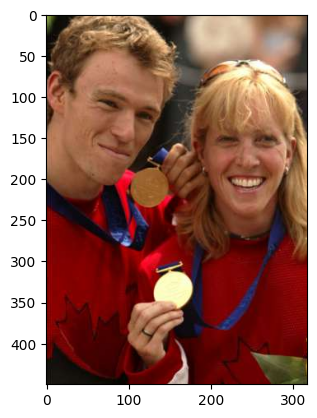

2002/07/19/big/img_581.jpg
img_581.jpg


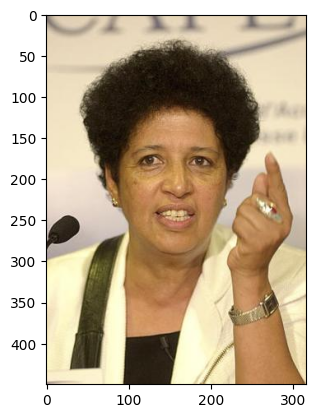

2002/08/13/big/img_723.jpg
img_723.jpg


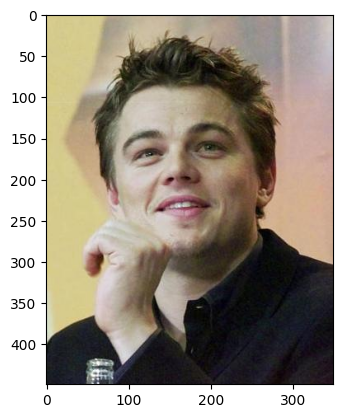

In [10]:
i = 0
for imgName in allImgNames:
    img = cv2.imread('originalPics/' + imgName)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # show image
    print(imgName)
    trimmed_imgName = re.findall(r'/[^/]*$', imgName)[0].replace('/', '')
    print(trimmed_imgName)
    plt.imsave('dsetmp/faces/'+trimmed_imgName, img)
    # plt.imshow(img)
    # plt.show()

    i += 1
    if i == 10:
        break
